In [1]:
from pogo import Pogo

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import  datasets#, mixture, cluster,

from urllib.request import urlopen
from urllib.parse import urlparse
import os.path

In [3]:
#data from scikitlearn tutorial on clustering 

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

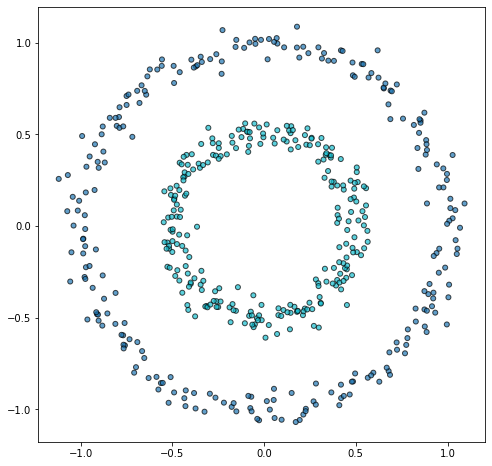

In [21]:
X=noisy_circles[0]
y=noisy_circles[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

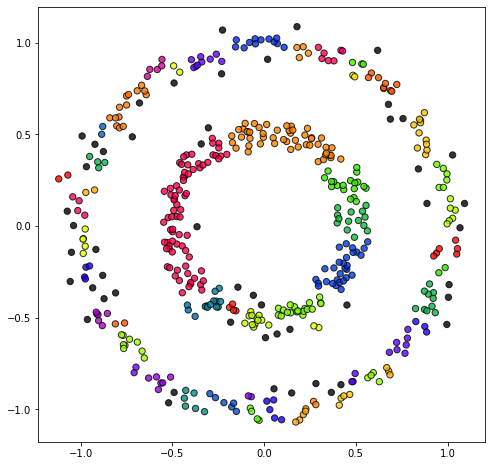

In [22]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

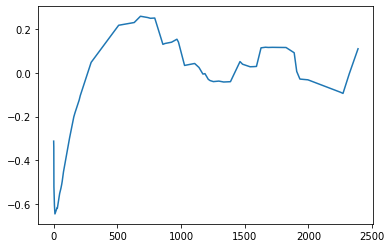

In [26]:
silhouete_indices, silhouette_array = pogo.plot_silhouette_score(60)


(array([   2,    7,   68,  794, 1188, 1228, 1254, 1297, 1335, 1483, 1592,
        1628, 1685, 1717, 1824, 1933, 1996, 2271, 2320, 2389]),
 array([3.25802632e-05, 4.19754517e-04, 7.70193188e-03, 1.17867531e-01,
        4.51372702e-01, 5.15601241e-01, 5.16805981e-01, 5.18058905e-01,
        5.18701427e-01, 5.75750731e-01, 6.12941383e-01, 6.15879745e-01,
        6.20568068e-01, 6.21611715e-01, 6.25705931e-01, 8.35263609e-01,
        8.38424004e-01, 9.88087844e-01, 9.96007968e-01, 1.00000000e+00]))

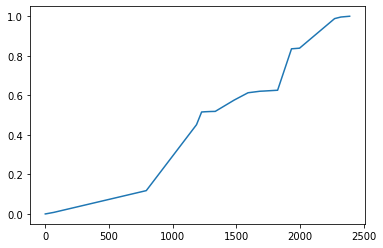

In [27]:
pogo.plot_rand_score(20,y)


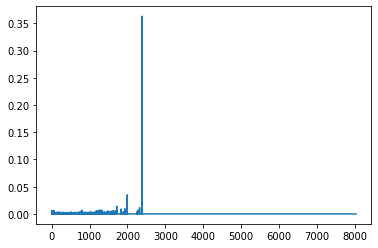

In [28]:
plt.plot(pogo.gap_vector_)

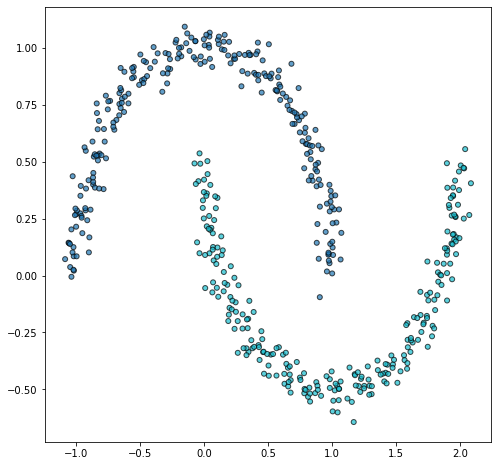

In [6]:
X=noisy_moons[0]
y=noisy_moons[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

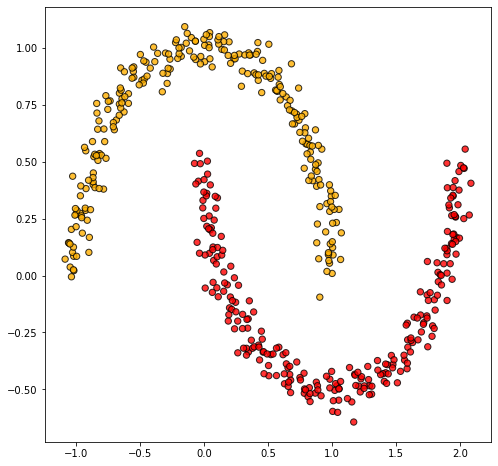

In [7]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

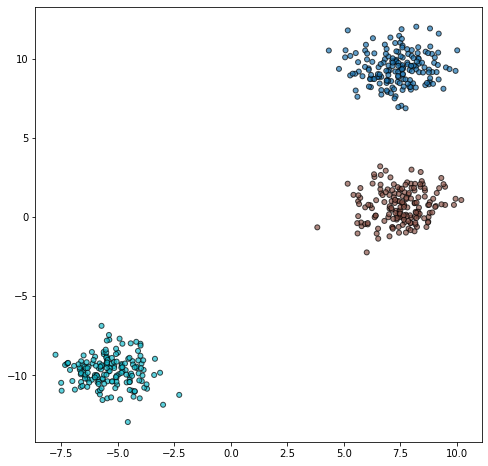

In [8]:
X=blobs[0]
y=blobs[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

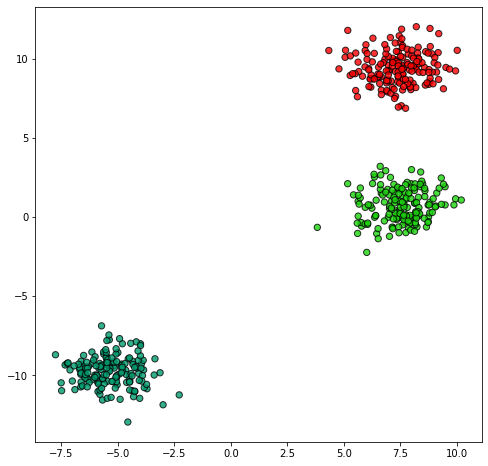

In [9]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

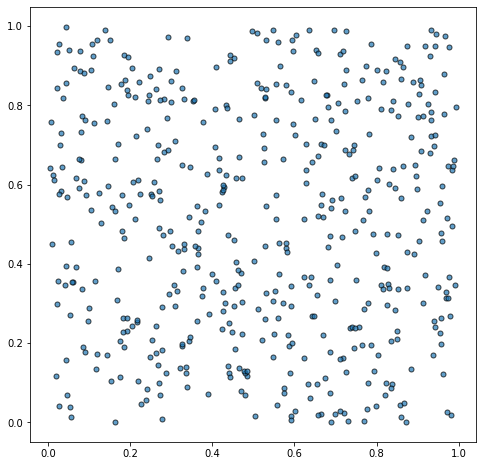

In [10]:
X=no_structure[0]
y=no_structure[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

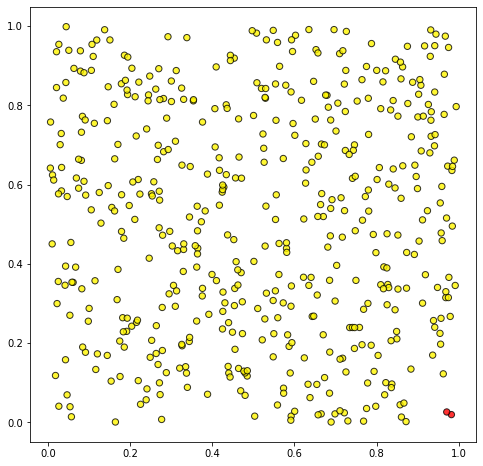

In [11]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

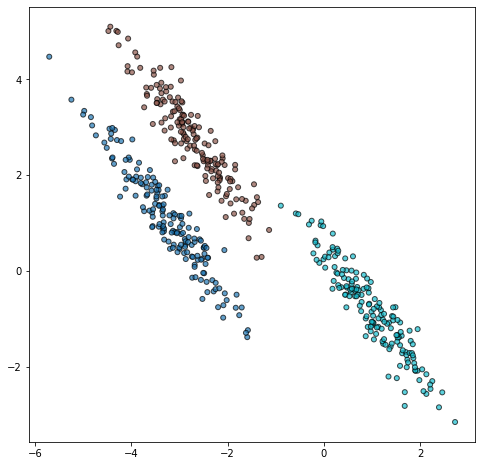

In [12]:
X=aniso[0]
y=aniso[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

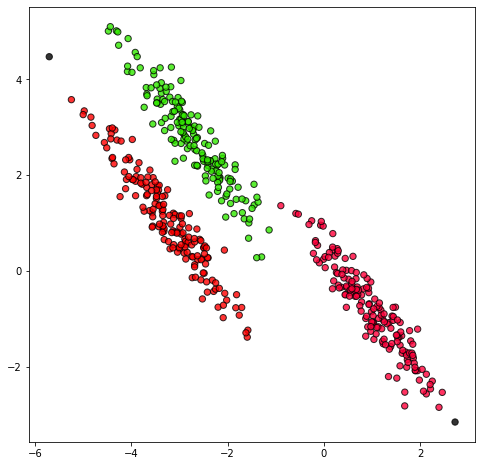

In [13]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

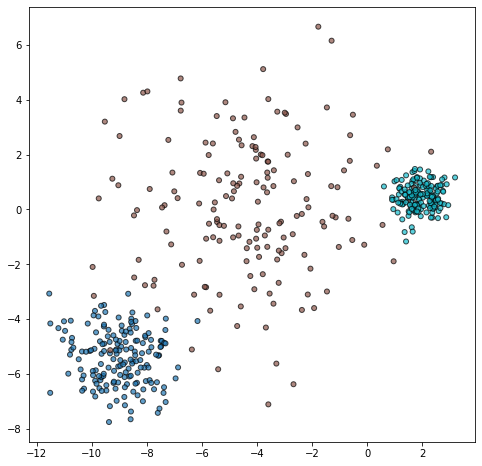

In [14]:
X=varied[0]
y=varied[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

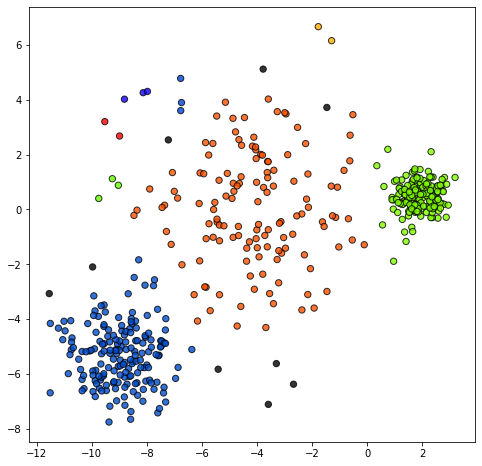

In [15]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [16]:
#DBSCAN Demo Data from scikitlearn
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, y = datasets.make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)
filename = 'dbscan-demo-data'

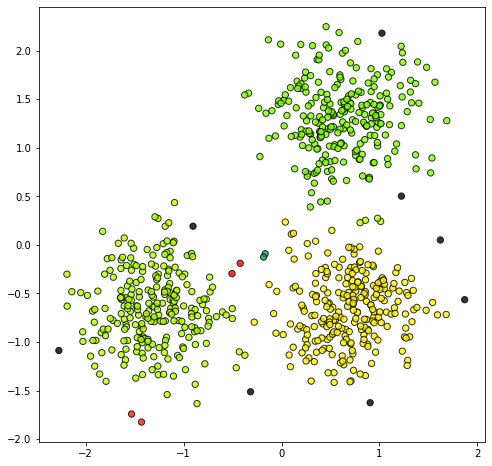

In [17]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [18]:

urls_with_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

urls_without_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/overlap.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/a1.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

ground_truth_urls = ['https://cs.joensuu.fi/sipu/datasets/overlap.pa'
    
]

urls_with_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_with_ground_truth
}


urls_without_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_without_ground_truth
}


ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in ground_truth_urls
}

In [19]:
def return_dataset(filename):
    if filename in urls_with_ground_truth:
        url= urls_with_ground_truth[filename]
        print(url)
        parse = urlparse(url)
        print(filename)
        raw_data = urlopen(url)
        data = np.loadtxt(raw_data)

        print(data.shape)
        print(data[:10])

        y = data[:,2]
        print(y.shape)
        X = data[:,:2]
        print(X.shape)
        return X, y, filename


In [20]:
X, y, filename = return_dataset('R15.txt')

https://cs.joensuu.fi/sipu/datasets/R15.txt
R15.txt
(600, 3)
[[ 9.802 10.132  1.   ]
 [10.35   9.768  1.   ]
 [10.098  9.988  1.   ]
 [ 9.73   9.91   1.   ]
 [ 9.754 10.43   1.   ]
 [ 9.836  9.902  1.   ]
 [10.238  9.866  1.   ]
 [ 9.53   9.862  1.   ]
 [10.154  9.82   1.   ]
 [ 9.336 10.456  1.   ]]
(600,)
(600, 2)
